## Notebook 2 : Geographical vizualizations and regional comparisons

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


In [24]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_geo = pd.read_csv('df_ll.csv')

df_geo.head()

/var/folders/ql/7rnwb81s5ms8q8f6v8hbbkb00000gn/T/ipykernel_9387/2820636168.py:5: DtypeWarning:

Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.



,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,Vente,346.5,LE DELIVRE,1230.0,1076,Chaley,1,010760000B0514,0.0,0,0.0,99.0,5.530952,45.952439
1,2024-2,2024-01-03,Vente,10000.0,CHEVRY DESSOUS,1170.0,1103,Chevry,1,011030000B1782,0.0,0,0.0,115.0,6.043339,46.282256
2,2024-3,2024-01-08,Vente,249000.0,PIN HAMEAU,1290.0,1203,Laiz,1,012030000C1065,0.0,0,0.0,497.0,4.911143,46.247235
3,2024-4,2024-01-03,Vente,329500.0,PL DU JURA,1170.0,1173,Gex,1,01173000AI0551,3.0,Dépendance,0.0,0.0,6.058695,46.332212
4,2024-4,2024-01-03,Vente,329500.0,PL DU JURA,1170.0,1173,Gex,1,01173000AI0551,2.0,Appartement,4.0,0.0,6.058695,46.332212


In [25]:
#### CONVERTS TO THE RIGHT TYPE ####

category_convert = ['id_mutation', 'nature_mutation', 'adresse_nom_voie', 'nom_commune', 'code_departement', 'id_parcelle', 'code_commune', 'code_type_local', 'type_local']
df_geo[category_convert] = df_geo[category_convert].astype('category')

df_geo['date_mutation'] = pd.to_datetime(df_geo['date_mutation'], errors = 'coerce')

df_geo['code_postal'] = df_geo['code_postal'].astype(int).astype(str)

df_geo['valeur_fonciere']=df_geo['valeur_fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_geo['valeur_fonciere']=pd.to_numeric(df_geo['valeur_fonciere'], errors='coerce')

df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316411 entries, 0 to 1316410
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id_mutation                1316411 non-null  category      
 1   date_mutation              1316411 non-null  datetime64[ns]
 2   nature_mutation            1316411 non-null  category      
 3   valeur_fonciere            1316411 non-null  float64       
 4   adresse_nom_voie           1316411 non-null  category      
 5   code_postal                1316411 non-null  object        
 6   code_commune               1316411 non-null  category      
 7   nom_commune                1316411 non-null  category      
 8   code_departement           1316411 non-null  category      
 9   id_parcelle                1316411 non-null  category      
 10  code_type_local            1316411 non-null  category      
 11  type_local                 1316411 no

In [26]:
#### CHECK MISSING VALUES ####
df_geo.isnull().sum()

id_mutation                  0
date_mutation                0
nature_mutation              0
valeur_fonciere              0
adresse_nom_voie             0
code_postal                  0
code_commune                 0
nom_commune                  0
code_departement             0
id_parcelle                  0
code_type_local              0
type_local                   0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
dtype: int64

In [27]:
#### CHECK DUPLICATES ####
#df_geo.drop_duplicates(keep='last', inplace=True)
df_geo.duplicated().sum()

0

In [28]:
df_geo.head()

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,nombre_pieces_principales,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,Vente,346.5,LE DELIVRE,1230,1076,Chaley,1,010760000B0514,0.0,0,0.0,99.0,5.530952,45.952439
1,2024-2,2024-01-03,Vente,10000.0,CHEVRY DESSOUS,1170,1103,Chevry,1,011030000B1782,0.0,0,0.0,115.0,6.043339,46.282256
2,2024-3,2024-01-08,Vente,249000.0,PIN HAMEAU,1290,1203,Laiz,1,012030000C1065,0.0,0,0.0,497.0,4.911143,46.247235
3,2024-4,2024-01-03,Vente,329500.0,PL DU JURA,1170,1173,Gex,1,01173000AI0551,3.0,Dépendance,0.0,0.0,6.058695,46.332212
4,2024-4,2024-01-03,Vente,329500.0,PL DU JURA,1170,1173,Gex,1,01173000AI0551,2.0,Appartement,4.0,0.0,6.058695,46.332212


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze geographical data (communes, departments) and its relationship to property values.
- Study temporal trends in transactions across regions.

In [29]:
#### LIBRARIES ####
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [30]:
#### PRICE PER SQUARE METER ####
df_geo['price_per_sq_meter'] = df_geo['valeur_fonciere'] / df_geo['surface_terrain']
df_geo['price_per_sq_meter'] = df_geo['price_per_sq_meter'].round(2)
df_geo.head()

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,nombre_pieces_principales,surface_terrain,longitude,latitude,price_per_sq_meter
0,2024-1,2024-01-02,Vente,346.5,LE DELIVRE,1230,1076,Chaley,1,010760000B0514,0.0,0,0.0,99.0,5.530952,45.952439,3.50
1,2024-2,2024-01-03,Vente,10000.0,CHEVRY DESSOUS,1170,1103,Chevry,1,011030000B1782,0.0,0,0.0,115.0,6.043339,46.282256,86.96
2,2024-3,2024-01-08,Vente,249000.0,PIN HAMEAU,1290,1203,Laiz,1,012030000C1065,0.0,0,0.0,497.0,4.911143,46.247235,501.01
3,2024-4,2024-01-03,Vente,329500.0,PL DU JURA,1170,1173,Gex,1,01173000AI0551,3.0,Dépendance,0.0,0.0,6.058695,46.332212,inf
4,2024-4,2024-01-03,Vente,329500.0,PL DU JURA,1170,1173,Gex,1,01173000AI0551,2.0,Appartement,4.0,0.0,6.058695,46.332212,inf


In [31]:
#### ANALISYS OF WHEN THERE'S NO BUILD ####
df_no_build = df_geo[df_geo['surface_terrain']==0]
mean_no_build = round(df_no_build['valeur_fonciere'].mean(), 2)
median_no_build = round(df_no_build['valeur_fonciere'].median(), 2)

print('No build average price per square meter : ', mean_no_build, '€')
print('No build median price per square meter : ', median_no_build, '€')

No build average price per square meter :  250766.7 €
No build median price per square meter :  162000.0 €


In [32]:
#### DELETE THE INF ####
df_geo['price_per_sq_meter'] = df_geo['price_per_sq_meter'].replace([np.inf, -np.inf], np.nan)
df_geo.dropna(subset=['price_per_sq_meter'], inplace=True)
df_geo.head()

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,nombre_pieces_principales,surface_terrain,longitude,latitude,price_per_sq_meter
0,2024-1,2024-01-02,Vente,346.5,LE DELIVRE,1230,1076,Chaley,1,010760000B0514,0.0,0,0.0,99.0,5.530952,45.952439,3.50
1,2024-2,2024-01-03,Vente,10000.0,CHEVRY DESSOUS,1170,1103,Chevry,1,011030000B1782,0.0,0,0.0,115.0,6.043339,46.282256,86.96
2,2024-3,2024-01-08,Vente,249000.0,PIN HAMEAU,1290,1203,Laiz,1,012030000C1065,0.0,0,0.0,497.0,4.911143,46.247235,501.01
5,2024-5,2024-01-09,Vente,20000.0,AU CHAUME,1110,1185,Plateau d'Hauteville,1,011851860A0004,0.0,0,0.0,1584.0,5.548635,45.900606,12.63
6,2024-5,2024-01-09,Vente,20000.0,LES FATES,1110,1185,Plateau d'Hauteville,1,011851860A0032,0.0,0,0.0,188.0,5.555398,45.899514,106.38


In [33]:
df_geo.isnull().sum()

id_mutation                  0
date_mutation                0
nature_mutation              0
valeur_fonciere              0
adresse_nom_voie             0
code_postal                  0
code_commune                 0
nom_commune                  0
code_departement             0
id_parcelle                  0
code_type_local              0
type_local                   0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
price_per_sq_meter           0
dtype: int64

In [34]:
#### GROUPING DATA BY DEPARTMENT AND COMMUNE + METRICS CALCULUS ####
grouped_geo = df_geo.groupby(['code_departement', 'nom_commune'], observed=True).agg(
    mean_value=('valeur_fonciere', 'mean'),
    median_value=('valeur_fonciere', 'median'),
    sum_value=('valeur_fonciere', 'sum'),
    count_transactions=('valeur_fonciere', 'count'),
    avg_price_per_sq_meter=('price_per_sq_meter', 'mean')
).reset_index()

grouped_geo.head()

,code_departement,nom_commune,mean_value,median_value,sum_value,count_transactions,avg_price_per_sq_meter
0,1,Ambléon,17810.000000,5310.0,71240.00,4,34.152500
1,1,Ambronay,152425.555556,136000.0,5487320.00,36,1627.262778
2,1,Ambutrix,136943.572000,188935.0,3423589.30,25,626.921600
3,1,Ambérieu-en-Bugey,179164.985196,180000.0,18274828.49,102,3396.020686
4,1,Ambérieux-en-Dombes,345908.792000,315000.0,8647719.80,25,1706.128000


In [35]:
grouped_geo.isnull().sum()

code_departement          0
nom_commune               0
mean_value                0
median_value              0
sum_value                 0
count_transactions        0
avg_price_per_sq_meter    0
dtype: int64

In [36]:
grouped_geo.describe()

,mean_value,median_value,sum_value,count_transactions,avg_price_per_sq_meter
count,3.114800e+04,3.114800e+04,3.114800e+04,31148.000000,3.114800e+04
mean,1.854830e+05,1.542187e+05,8.700356e+06,31.168743,1.472982e+03
std,8.010775e+05,8.474740e+05,5.362910e+07,46.802395,1.974968e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000e+00
25%,5.180049e+04,2.650000e+04,4.998826e+05,7.000000,1.038193e+02
50%,1.073896e+05,8.900000e+04,1.763905e+06,17.000000,3.284680e+02
75%,1.870000e+05,1.791250e+05,5.304987e+06,38.000000,9.523713e+02
max,5.043889e+07,8.815000e+07,3.678767e+09,1169.000000,2.864714e+06


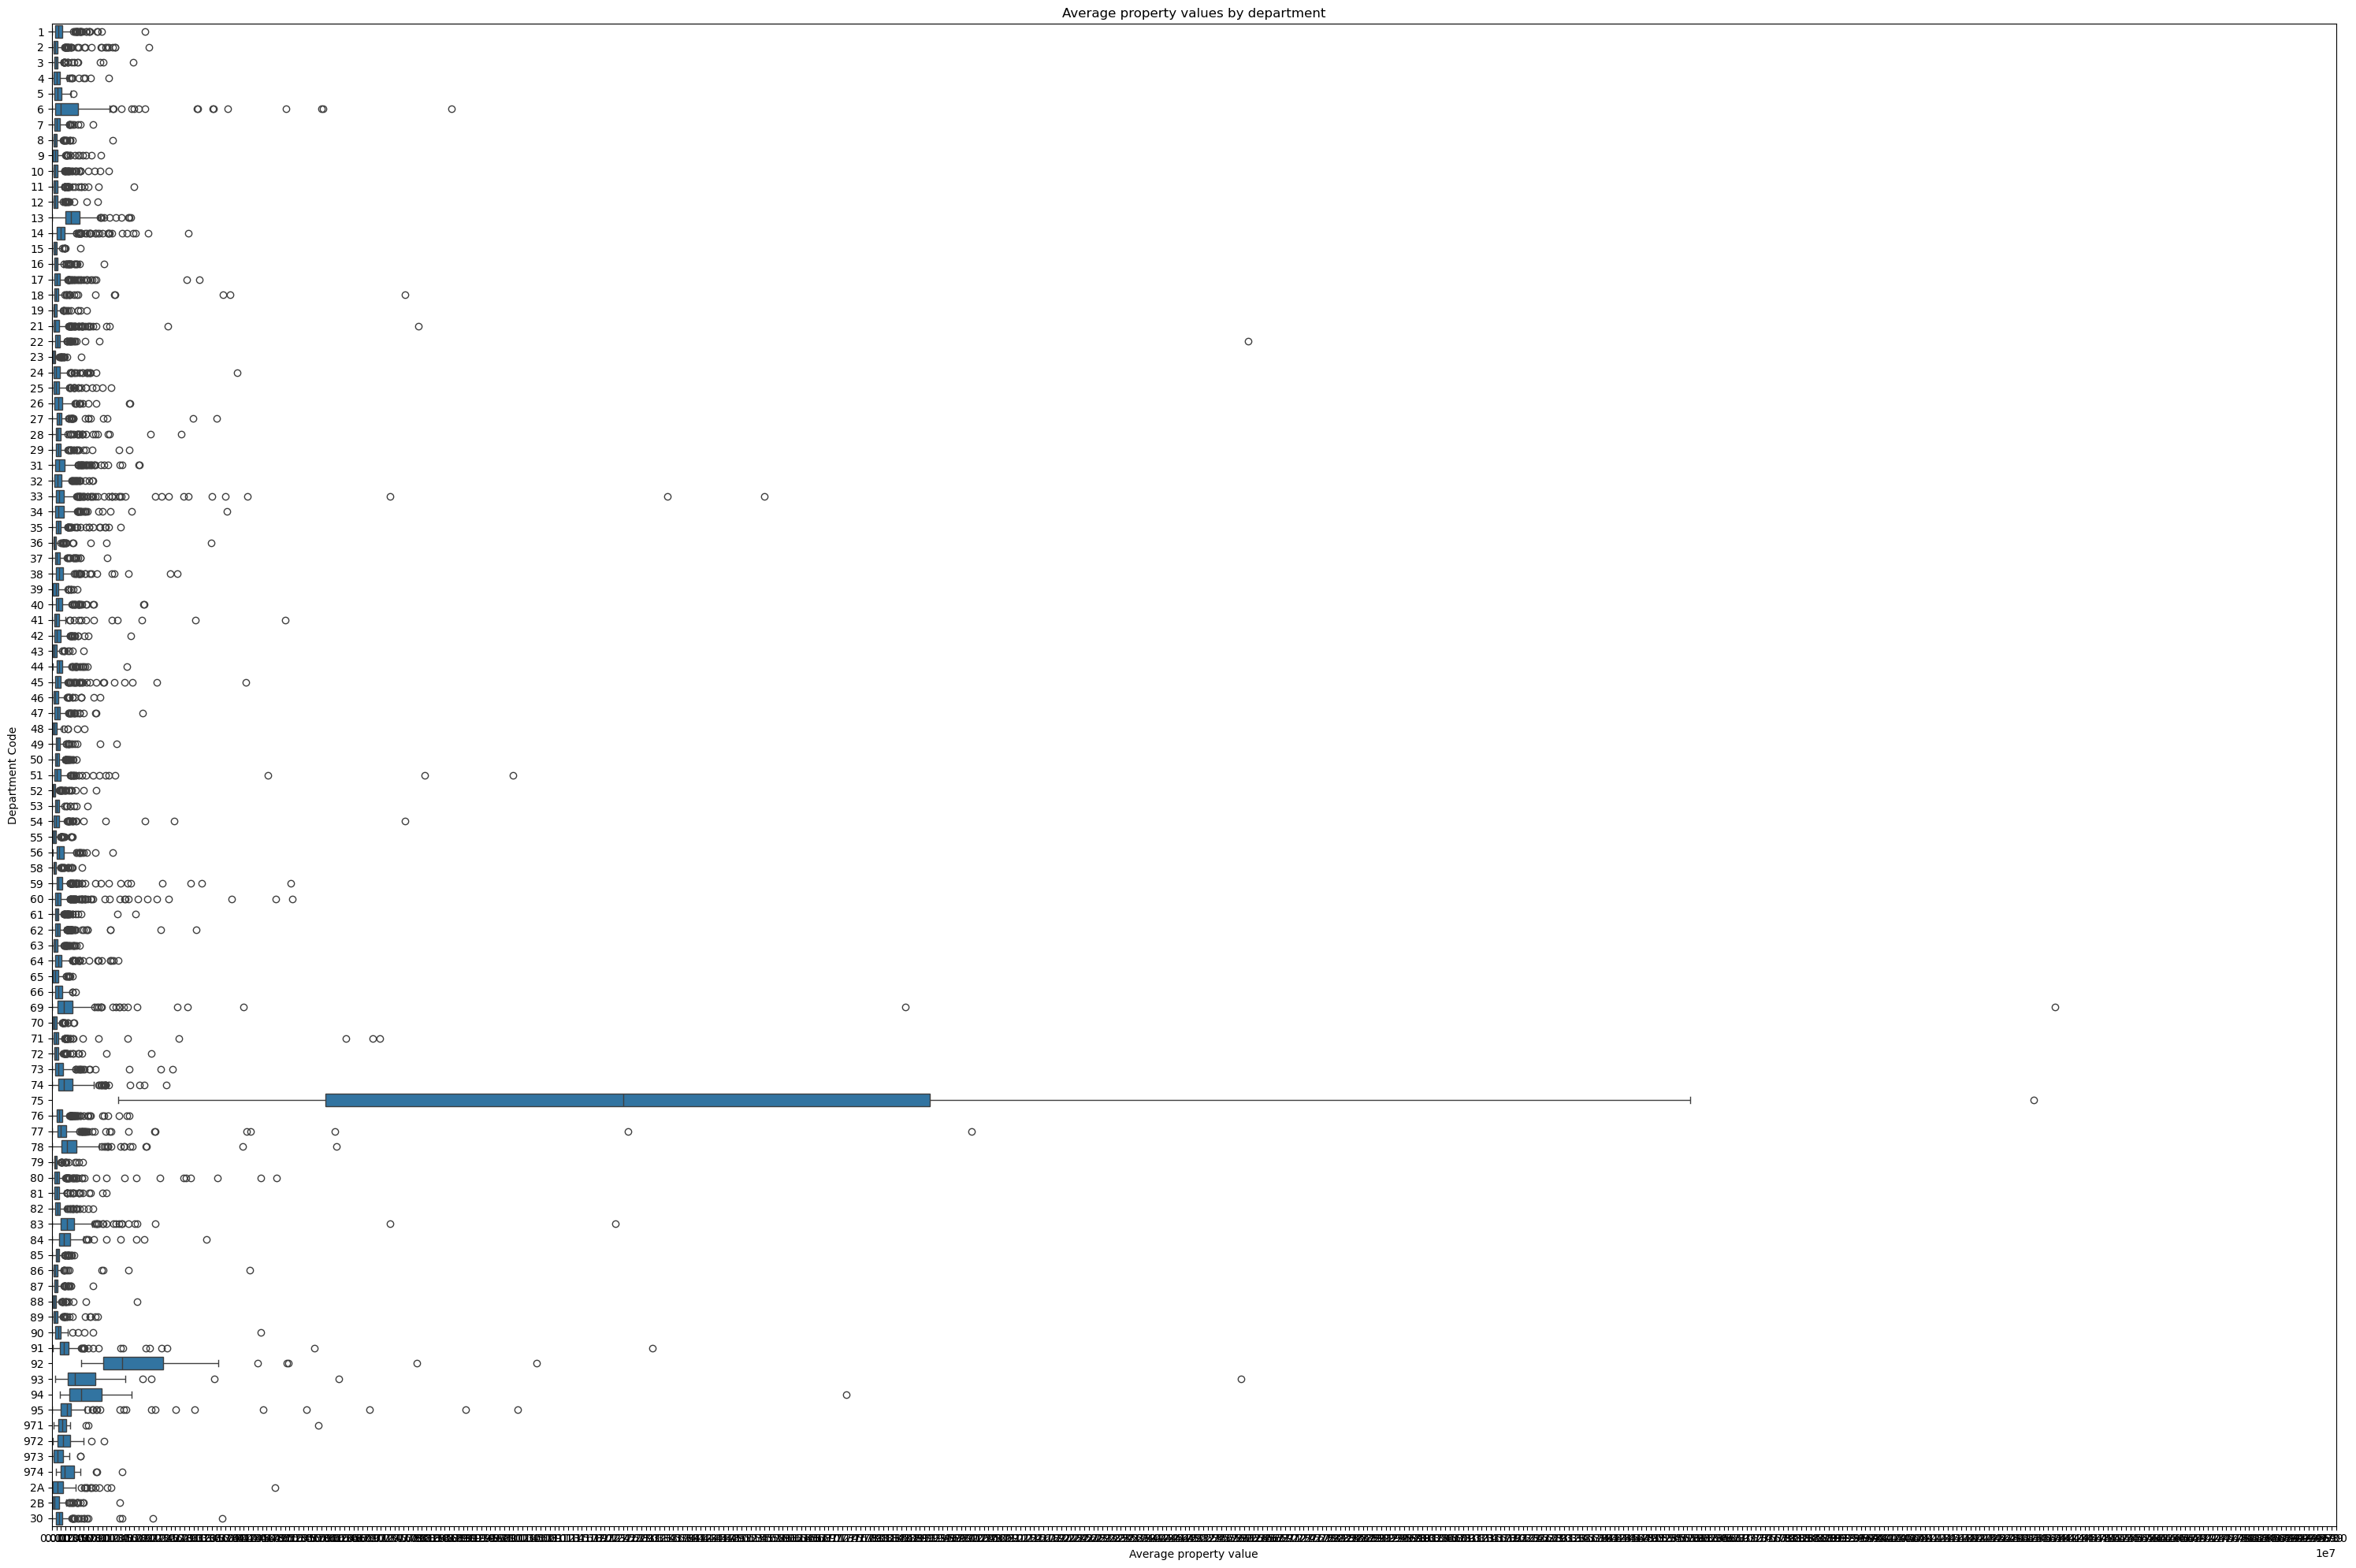

In [37]:
#### IDENTIFY OUTLIERS ####
plt.figure(figsize=(30, 20))
sns.boxplot(data=grouped_geo, x='mean_value', y='code_departement')

plt.title('Average property values by department')
plt.xlabel('Average property value')
plt.ylabel('Department Code')
x_ticks = np.arange(0, grouped_geo['mean_value'].max(), step=100000)
plt.xticks(x_ticks)
plt.xlim(-10, 50000000)
#plt.yticks(range(start, end, step))
#plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

There are a lot of outliers , this can be explained because of the type of local sold, the year they were sold (inflation ?), their size or their localization. Let's analyze that.

In [38]:
#### SEPARATE OUTLIERS WITH IQR ####
Q1 = df_geo['valeur_fonciere'].quantile(0.25)
Q3 = df_geo['valeur_fonciere'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_geo[(df_geo['valeur_fonciere'] < lower_bound) | (df_geo['valeur_fonciere'] > upper_bound)]
non_outliers = df_geo[(df_geo['valeur_fonciere'] >= lower_bound) & (df_geo['valeur_fonciere'] <= upper_bound)]

outliers.head()

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,code_type_local,type_local,nombre_pieces_principales,surface_terrain,longitude,latitude,price_per_sq_meter
105,2024-21,2024-01-08,Vente,620000.0,RUE DE LA FRUITIERE,1170,1071,Cessy,1,01071000AT0073,3.0,Dépendance,0.0,185.0,6.071652,46.317463,3351.35
106,2024-21,2024-01-08,Vente,620000.0,RUE DE LA FRUITIERE,1170,1071,Cessy,1,01071000AT0073,1.0,Maison,7.0,185.0,6.071652,46.317463,3351.35
107,2024-21,2024-01-08,Vente,620000.0,CESSY VILLAGE,1170,1071,Cessy,1,01071000AT0075,0.0,0,0.0,35.0,6.071665,46.317311,17714.29
108,2024-21,2024-01-08,Vente,620000.0,CESSY VILLAGE,1170,1071,Cessy,1,01071000AT0075,0.0,0,0.0,34.0,6.071665,46.317311,18235.29
109,2024-21,2024-01-08,Vente,620000.0,CESSY VILLAGE,1170,1071,Cessy,1,01071000AT0077,0.0,0,0.0,130.0,6.071511,46.317215,4769.23


We see that a lot of them are commercial or industrial locals but also those who are near the frontear with Sweden which could explain why they are expensive.

In [39]:
#### GROUPING OUTLIERS BY DEPARTMENT AND COMMUNE ####
grouped_outliers = outliers.groupby(['code_departement', 'nom_commune'], observed=True).agg(
    mean_outliers_value=('valeur_fonciere', 'mean'),
    median_outliers_value=('valeur_fonciere', 'median'),
    sum_outliers_value=('valeur_fonciere', 'sum'),
    count_outliers_transactions=('valeur_fonciere', 'count'),
    outliers_avg_price_per_sq_meter=('price_per_sq_meter', 'mean')
).reset_index()

grouped_outliers.head()

,code_departement,nom_commune,mean_outliers_value,median_outliers_value,sum_outliers_value,count_outliers_transactions,outliers_avg_price_per_sq_meter
0,1,Ambérieux-en-Dombes,7.015653e+05,742600.0,4910957.0,7,4357.135714
1,1,Apremont,8.480000e+05,848000.0,848000.0,1,776.560000
2,1,Arbent,1.500000e+06,1500000.0,10500000.0,7,1261.002857
3,1,Balan,7.650000e+05,765000.0,765000.0,1,129.600000
4,1,Belley,9.000000e+05,900000.0,2700000.0,3,5041.556667


In [40]:
grouped_outliers.isnull().sum()

code_departement                   0
nom_commune                        0
mean_outliers_value                0
median_outliers_value              0
sum_outliers_value                 0
count_outliers_transactions        0
outliers_avg_price_per_sq_meter    0
dtype: int64

In [41]:
#### METRICS COMPARISON ####

# All
mean_all = df_geo['valeur_fonciere'].mean()
median_all = df_geo['valeur_fonciere'].median()

# Non-outliers
mean_non_outliers = non_outliers['valeur_fonciere'].mean()
median_non_outliers = non_outliers['valeur_fonciere'].median()

# Outliers
mean_outliers = outliers['valeur_fonciere'].mean()
median_outliers = outliers['valeur_fonciere'].median()

print("General mean :", mean_all)
print("General median :", median_all)
print("\nNon-outliers mean :", mean_non_outliers)
print("Non-outliers median :", median_non_outliers)
print("\nOutliers mean :", mean_outliers)
print("Outliers median :", median_outliers)


General mean : 279137.1985844791
General median : 114205.0

Non-outliers mean : 137092.3300389299
Non-outliers median : 100000.0

Outliers mean : 2213950.8896509036
Outliers median : 958315.0


We see that the general metrics are not that affected by the outliers, but it is still interesting separate them from the rest annd study them.

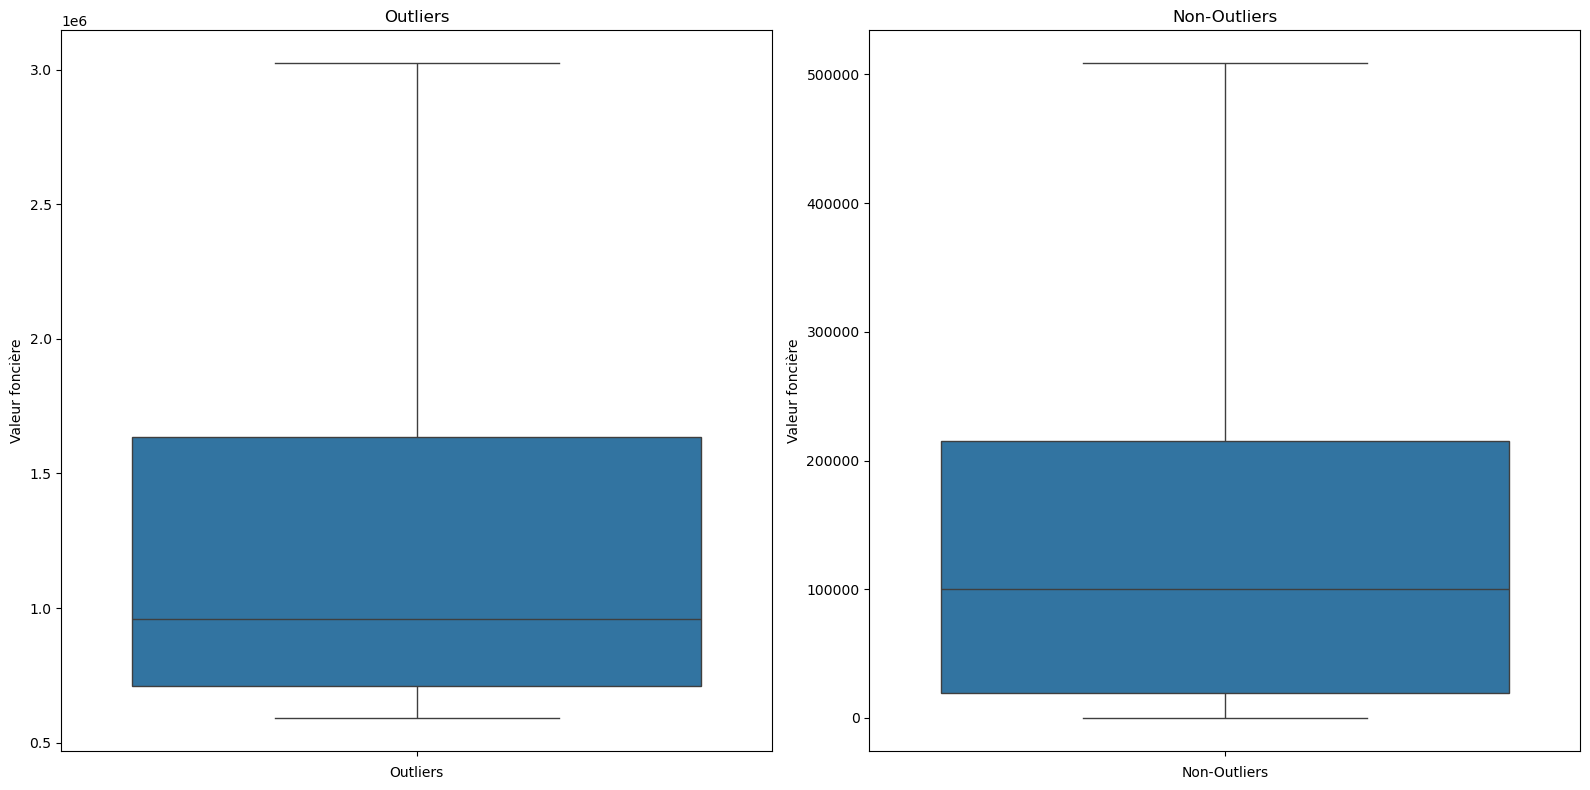

In [42]:
#### COMPARISON BW OUTLIERS AND NON-OUTLIERS ####
plt.figure(figsize=(16, 8))

# Outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=outliers['valeur_fonciere'], showfliers=False)
plt.title('Outliers')
plt.ylabel('Valeur foncière')
plt.xlabel('Outliers')

# Non-outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=non_outliers['valeur_fonciere'], showfliers=False)
plt.title('Non-Outliers')
plt.ylabel('Valeur foncière')
plt.xlabel('Non-Outliers')

plt.tight_layout()
plt.show()


We see that the outliers start at 500 000€, exactly where the non outliers stop, and they go up to 3 000 000€.

## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Interactive maps of property values by department/commune.
- Bar charts or heatmaps comparing average prices by region.

In [43]:
#### MAP AVERAGE PRICE PER SQUARE METER BY DEPARTMENTS ####
fig = px.scatter_mapbox(
    df_geo,
    lat='latitude',
    lon='longitude',
    color='price_per_sq_meter',
    size='price_per_sq_meter',
    hover_name='code_departement',
    mapbox_style='carto-positron',
    title='Average price per square meter by department',
    zoom=5,
    color_continuous_scale="Pinkyl"
)

fig.update_layout(
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    coloraxis_colorbar_title="Valeur foncière (€)"
)
fig.show(renderer="browser")

In [ ]:
#### OUTLIERS VS NON OUTLIERS TYPE LOCAL ####

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Identify regions with the highest or lowest property values.
- Spot any geographical anomalies in property prices.

Recommendations :
- Investment advice based on regions with strong growth or attractive prices.
- Suggestions on how to leverage geographical trends for better returns.